# Exercise for UML

# Project Title - Spotify recommender system
## About the Dataset
These dataset contains 114000 song and metadata about the songs such as their popularity and genres. The exercise is divided in three part mainly EDA, PCA and Clustering and finally the recommender system.
Try to write your own functions and know your keyboard shortcuts.
You can work on GoogleCollab or work locally.

The dataset: https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify.csv

# Part 1

## Goals of Part 1
    1. Clean up the dataset and check for duplicates
    2. EDA
    3. Plots
## Relevant libraries for this part
    1. Pandas
    2. Numpy
    3. Matplotlib
    4. Seaborn
    5. Pygwalker



In [ ]:
pip install pygwalker -q

## Exercises Part 1

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import pygwalker as pyg
import matplotlib.pyplot as plt

In [ ]:
# Import the dataset. How are you doing it?
ds=pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv')

In [ ]:
# Understand the dataset. What columns are available?
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
ds.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
ds['popularity'].max()

100

In [ ]:
ds.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [ ]:
# Check for missing values. How would you handle them?
ds.isna().nunique()
ds.dropna(inplace=True)

In [ ]:
# Are there any outliers or unusual values in the dataset?
ds['duration_ms']

0         230666
1         149610
2         210826
3         201933
4         198853
           ...  
113995    384999
113996    385000
113997    271466
113998    283893
113999    241826
Name: duration_ms, Length: 113999, dtype: int64

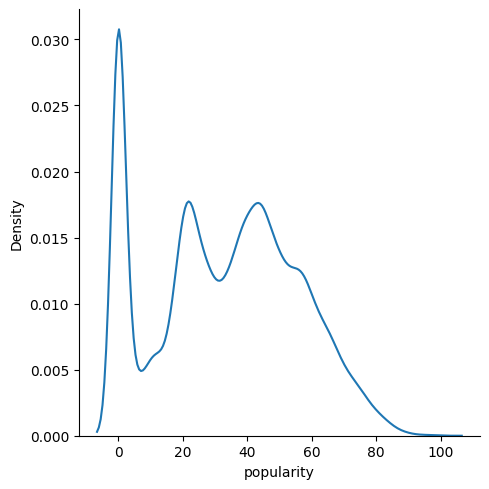

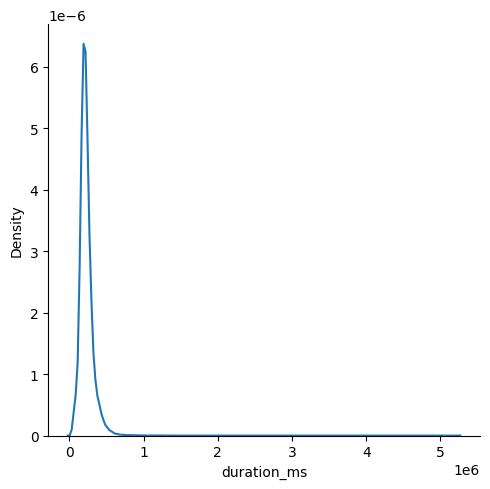

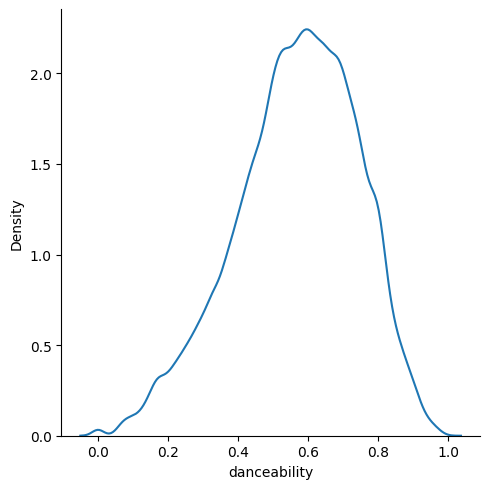

In [ ]:
#  What are the distributions of song popularity, duration_ms, and danceability? Use appropriate visualizations.
# nomad-cost (pre-scaling)
sns.displot(data=ds,
            x="popularity",
            kind="kde")
sns.displot(data=ds,
            x="duration_ms",
            kind="kde")
sns.displot(data=ds,
            x="danceability",
            kind="kde")
#  How many unique genres are in the dataset? List the top 20. (Explain how you choose to list the top 20)

In [ ]:
#  How many unique genres are in the dataset? List the top 20. (Explain how you choose to list the top 20)
genre_counts = ds['track_genre'].value_counts()
top_20_genres = genre_counts.head(20)
print("Top 20 Unique Genres:")
for genre, count in top_20_genres.iteritems():
    print(f"- {genre}: {count}")


Top 20 Unique Genres:
- acoustic: 1000
- funk: 1000
- drum-and-bass: 1000
- dub: 1000
- dubstep: 1000
- edm: 1000
- electro: 1000
- electronic: 1000
- emo: 1000
- folk: 1000
- forro: 1000
- french: 1000
- garage: 1000
- afrobeat: 1000
- german: 1000
- gospel: 1000
- goth: 1000
- grindcore: 1000
- groove: 1000
- grunge: 1000


<ipython-input-51-aff4568f25c4>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for genre, count in top_20_genres.iteritems():


In [ ]:
len(ds.value_counts(ds['track_genre'])) #114 different genres.

50

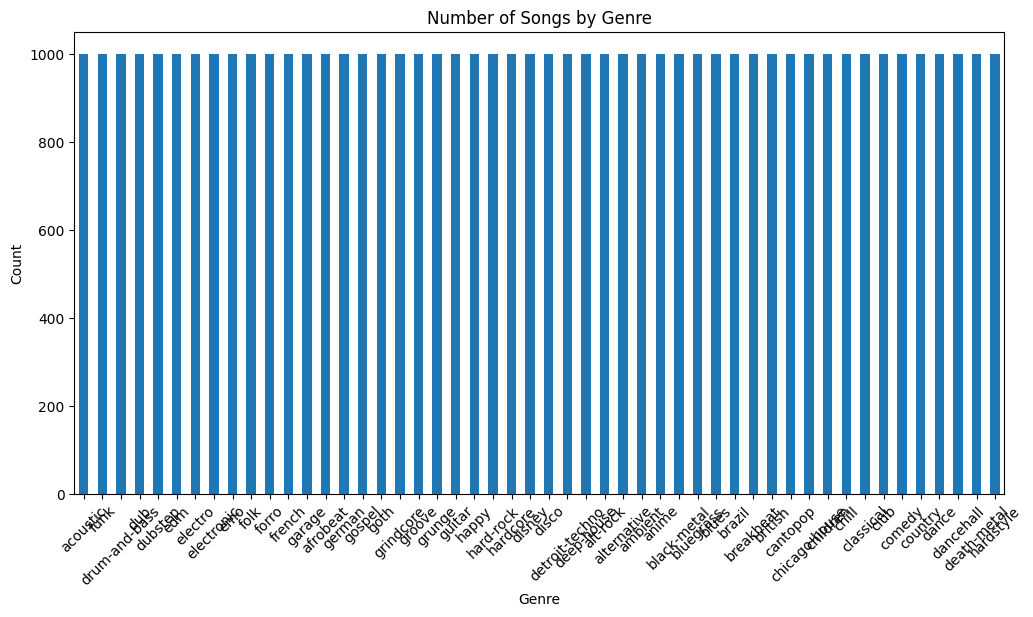

In [ ]:
#   Visualize the number of songs by genre. Which are the most common genres?
genre_counts = ds['track_genre'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#   Rank genres by the average popularity of their songs. Which genres tend to have more popular songs?
popularity = ds.groupby('track_genre')['popularity'].sum().sort_values(ascending=False)
print(popularity)

track_genre
chill             53651
grunge            49594
anime             48772
emo               48128
deep-house        44808
brazil            44670
electronic        44325
ambient           44191
british           43802
hard-rock         42775
acoustic          42483
dubstep           42317
forro             41826
gospel            41639
french            41067
garage            40933
dub               40039
folk              38006
groove            37825
hardcore          36105
electro           36075
children          35047
edm               35032
cantopop          34739
alt-rock          33943
disco             33522
dancehall         33467
club              33338
funk              32322
death-metal       32169
blues             31188
guitar            29526
goth              28913
disney            27536
german            26751
drum-and-bass     26657
hardstyle         26623
bluegrass         25676
comedy            24628
afrobeat          24399
alternative       24337
danc

In [ ]:
#   Explore other characteristics (like danceability, energy, etc.) by genre. Are there any noticeable differences or trends?
energy = ds.groupby('track_genre')['energy'].sum().sort_values(ascending=False)
print(energy)

track_genre
death-metal       931.470000
grindcore         924.201000
happy             910.971000
hardstyle         901.246000
drum-and-bass     876.635000
black-metal       874.897300
breakbeat         853.275000
hardcore          842.453000
grunge            803.290000
hard-rock         795.039000
forro             789.526000
groove            763.621800
dubstep           758.969000
edm               756.196000
alt-rock          754.173000
garage            744.350000
deep-house        741.855000
goth              740.969920
disco             737.565000
chicago-house     733.215000
club              721.733800
alternative       720.030000
dub               714.817000
detroit-techno    710.512400
dance             708.583000
afrobeat          702.812000
comedy            699.934000
electronic        694.752300
dancehall         685.262000
anime             674.108300
emo               669.966920
electro           665.000000
funk              632.999000
brazil            620.721000
co

In [ ]:
dance = ds.groupby('track_genre')['danceability'].sum().sort_values(ascending=False)
print(dance)

track_genre
kids             778.9060
chicago-house    766.1760
reggaeton        758.5210
latino           757.0570
reggae           745.3310
                   ...   
opera            313.5631
iranian          300.6860
black-metal      296.4109
grindcore        271.8537
sleep            167.9225
Name: danceability, Length: 114, dtype: float64


In [ ]:
duration = ds.groupby('track_genre')['duration_ms'].sum().sort_values(ascending=False)
print(duration)

track_genre
detroit-techno    372012402
minimal-techno    368863246
chicago-house     366853868
breakbeat         321762218
iranian           319709537
                    ...    
disney            156257344
sad               153800880
study             141568534
children          138987757
grindcore         133753507
Name: duration_ms, Length: 114, dtype: int64


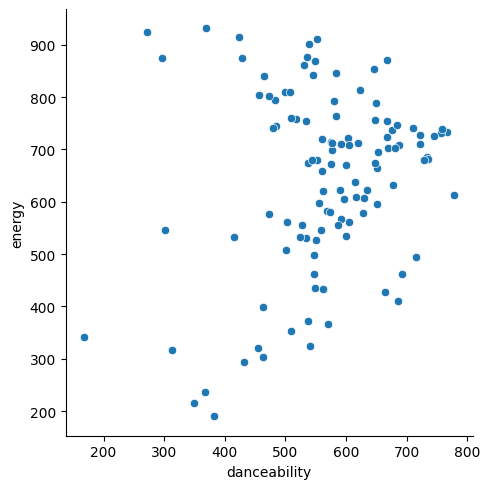

In [ ]:
 # Investigate the relationship between danceability and energy. Do songs that are more danceable tend to have more energy? Use a scatter plot.
 #It looks like the song that are more danceable tend to have higher energy if you look at the scatterplot
 sns.relplot(data=ds,
            x=dance,
            y=energy,
            kind="scatter")

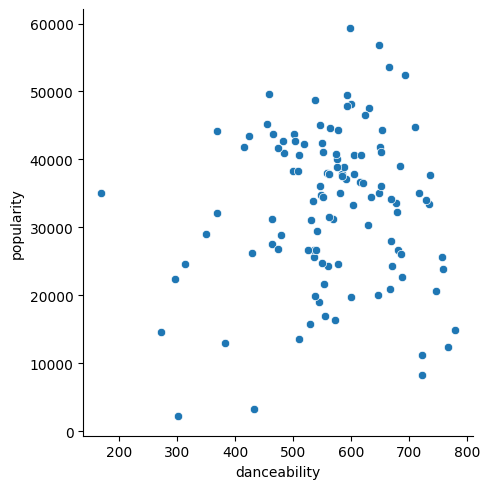

In [ ]:
  # How does song popularity relate to other characteristics like danceability, loudness, or tempo?
sns.relplot(data=ds,
            x=dance,
            y=popularity,
            kind="scatter")

In [ ]:
 #  How do explicit songs compare to non-explicit ones in terms of popularity or other characteristics?
#Group data into explicit and non-explicit songs

explicit_songs = ds[ds['explicit'] == True]  # Select rows where 'explicit' is True

non_explicit_songs = ds[ds['explicit'] == False]  # Select rows where 'explicit' is False



# Compare popularity using summary statistics

explicit_popularity_mean = explicit_songs['popularity'].mean()

non_explicit_popularity_mean = non_explicit_songs['popularity'].mean()



# Print the mean popularity for explicit and non-explicit songs

print(f"Mean Popularity for Explicit Songs: {explicit_popularity_mean}")

print(f"Mean Popularity for Non-Explicit Songs: {non_explicit_popularity_mean}")

Mean Popularity for Explicit Songs: 36.4541910331384
Mean Popularity for Non-Explicit Songs: 32.93820742048114


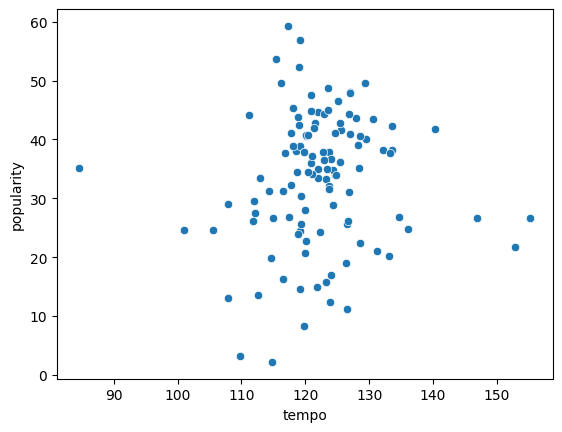

In [ ]:
 #  Are there any trends related to tempo or time_signature?
tempo = ds.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)
popularity = ds.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=ds, x=tempo, y=popularity)
plt.show()

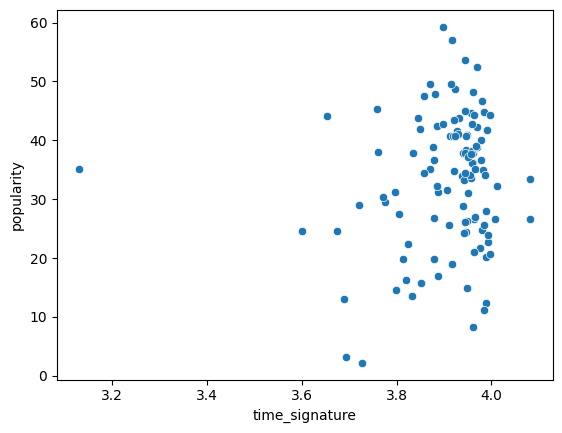

In [ ]:
time_signature = ds.groupby('track_genre')['time_signature'].mean().sort_values(ascending=False)
popularity = ds.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=ds, x=time_signature, y=popularity)
plt.show()

# Part 2

## Goals of Part 2
    1. Pre-processing for PCA (encoding & scaling)
    2. PCA and explanations of results
    3. Clustering
## Relevant libraries for this part
    1. StandardScaler
    2. PCA
    3. KMeans



In [ ]:
# Importing StandardScaler from scikit-learn (sklearn)
from sklearn.preprocessing import StandardScaler

# Importing PCA (Principal Component Analysis) from scikit-learn (sklearn)
from sklearn.decomposition import PCA

# Importing KMeans clustering algorithm from scikit-learn (sklearn)
from sklearn.cluster import KMeans


In [ ]:
from sklearn.preprocessing import LabelEncoder

ds = pd.DataFrame(ds)

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode all categorical columns in the DataFrame
for column in ds.select_dtypes(include=['object']):
    ds[column + '_encoded'] = encoder.fit_transform(ds[column])

# Display the new DataFrame
print(ds)

        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                    

In [ ]:
original_df = pd.DataFrame(ds)

# Specify the columns you want to include in the new DataFrame
selected_columns = ['Unnamed: 0', 'danceability',  'energy', 'popularity',  'duration_ms', 'track_name_encoded',  'track_genre_encoded', 'track_id_encoded',  'artists_encoded',  'album_name_encoded', 'liveness',  'valence',  'tempo',  'time_signature']

# Create a new DataFrame with the selected columns
new_df = original_df[selected_columns]

# You can also create a copy of the selected columns, if needed
# new_df = original_df[selected_columns].copy()

# Display the new DataFrame
print(new_df)

        Unnamed: 0  danceability  energy  popularity  duration_ms  \
0                0         0.676  0.4610          73       230666   
1                1         0.420  0.1660          55       149610   
2                2         0.438  0.3590          57       210826   
3                3         0.266  0.0596          71       201933   
4                4         0.618  0.4430          82       198853   
...            ...           ...     ...         ...          ...   
113995      113995         0.172  0.2350          21       384999   
113996      113996         0.174  0.1170          22       385000   
113997      113997         0.629  0.3290          22       271466   
113998      113998         0.587  0.5060          41       283893   
113999      113999         0.526  0.4870          22       241826   

        track_name_encoded  track_genre_encoded  track_id_encoded  \
0                    11741                    0             62845   
1                    22528       

In [ ]:
#  Handle any missing or categorical data.
#  Standardize the dataset since PCA is sensitive to the magnitude of the data.
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)
scaled_df

array([[-1.7320262 ,  0.62923855, -0.71714698, ...,  0.92931467,
        -1.14185449,  0.2218242 ],
       [-1.73199581, -0.84590813, -1.88997393, ..., -0.79868091,
        -1.48970775,  0.2218242 ],
       [-1.73196543, -0.74218688, -1.12266681, ..., -1.36567947,
        -1.52830252,  0.2218242 ],
       ...,
       [ 1.73197017,  0.35841084, -1.24193735, ...,  1.0373144 ,
         0.34125863,  0.2218242 ],
       [ 1.73200056,  0.11639459, -0.53824118, ..., -0.23553949,
         0.46074562,  0.2218242 ],
       [ 1.73203095, -0.23510521, -0.61377919, ...,  0.90231474,
        -1.43269958,  0.2218242 ]])

In [ ]:
 # Conduct a PCA on the song characteristics.
# Create a PCA instance with the desired number of components
n_components = 5  # Choose the number of components you want to keep
pca = PCA(n_components=n_components)
# Fit the PCA model to the data and transform the data to the principal components
X_pca = pca.fit_transform(scaled_df)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)
 # Visualize the explained variance for each principal component.

Explained Variance Ratios: [0.14431368 0.12711119 0.09562469 0.09136033 0.07540228]


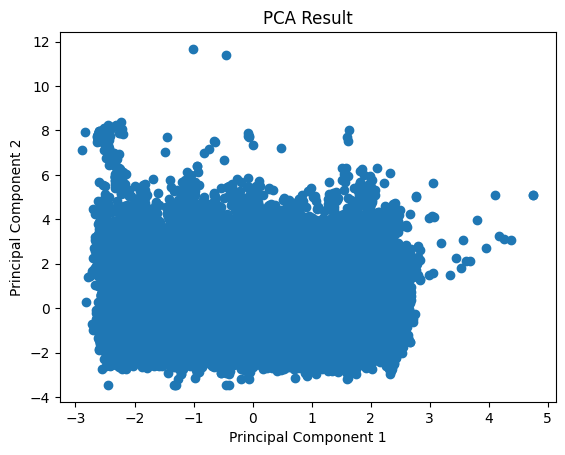

In [ ]:
 # Reduce the dataset's dimensions based on the PCA results and visualize the data in the reduced dimension space.
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

In [ ]:
 #   Choose a clustering algorithm (e.g., KMeans, DBSCAN, or Hierarchical).

We're using the Kmeans because we have a lot of datapoints.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

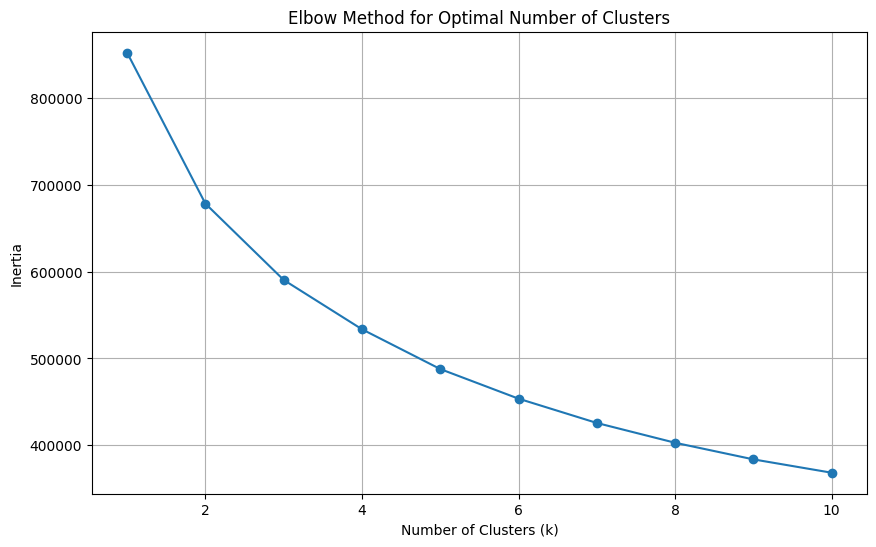

In [ ]:
# Initialize variables
inertia_values = []
k_range = range(1, 11)  # We will check for up to 10 clusters
# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

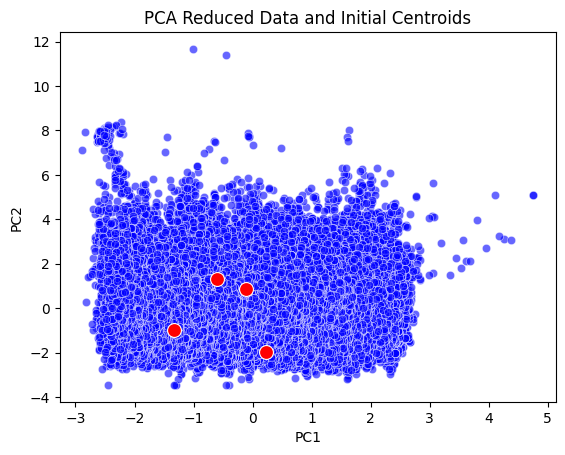

In [ ]:
import numpy as np
k=4
centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]
# Plot observations
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and Initial Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
def k_means_simple(X_pca, k, max_iters=100):
    # 1. Initialize the k cluster centroids
    centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # 2. Assign each data point to the closest centroid
        distances = np.linalg.norm(X_pca - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)

        # 3. Recompute the centroids
        new_centroids = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [ ]:
labels, final_centroids = k_means_simple(X_pca, 4)
print("Cluster centroids:\n", final_centroids)

Cluster centroids:
 [[ 0.71324094  0.26104918  0.57818643  1.30546887 -0.1039884 ]
 [-1.35046717 -0.60739272 -0.06737846 -0.05783728  0.10904452]
 [-0.39853392  2.19973334 -0.07941736 -0.57910659 -0.21323398]
 [ 1.2940536  -0.53612126 -0.2732253  -0.53268226  0.04638626]]


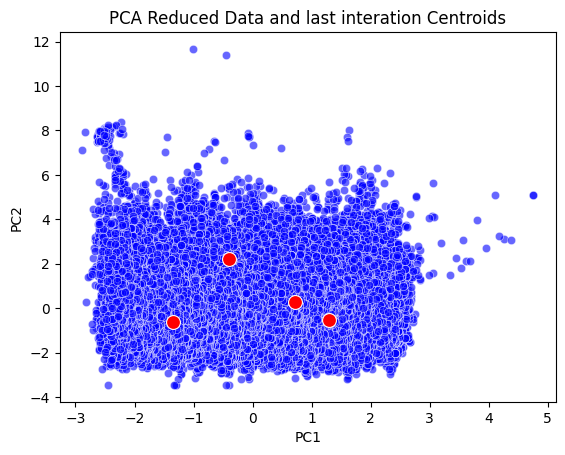

In [ ]:
 #   Cluster the songs based on the reduced dimensions from PCA.
 # Plot observations after 100st interation
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=final_centroids[:, 0], y=final_centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and last interation Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
 #   Visualize the clusters and interpret any patterns. Write your interpretations

# Part 3

## Goals of Part 3
    1. Vectorization   
    2. Cosine similarities
    3. Build and test recommender
    Objective: Develop a basic music recommender system that suggests songs based on textual data and put it in a small grad.io app
## Relevant libraries for this part
    1. linear_kernel
    2. TfidfVectorizer
    3. grad.io

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

Build the Recommender:

  Create a function that takes a song name as input and outputs a list of songs recommended based on textual similarity. For this, you'll use the cosine similarity scores.

In [ ]:
# Refine the Textual Data: Consider merging multiple textual columns (e.g., artist name + track name) to generate recommendations based on combined textual data.
# Merge 'artists' and 'track_name' columns with a separator

ds['song_artist'] = ds['artists'] + ' - ' + ds['track_name']
# Display the DataFrame with the new 'combined_text' column

print(ds[['artists', 'track_name', 'song_artist']])

                       artists                  track_name  \
0                  Gen Hoshino                      Comedy   
1                 Ben Woodward            Ghost - Acoustic   
2       Ingrid Michaelson;ZAYN              To Begin Again   
3                 Kina Grannis  Can't Help Falling In Love   
4             Chord Overstreet                     Hold On   
...                        ...                         ...   
113995           Rainy Lullaby         Sleep My Little Boy   
113996           Rainy Lullaby            Water Into Light   
113997           Cesária Evora              Miss Perfumado   
113998        Michael W. Smith                     Friends   
113999           Cesária Evora                   Barbincor   

                                      song_artist  
0                            Gen Hoshino - Comedy  
1                 Ben Woodward - Ghost - Acoustic  
2         Ingrid Michaelson;ZAYN - To Begin Again  
3       Kina Grannis - Can't Help Falling In Lo

In [ ]:
import scipy.sparse as ss

In [ ]:
# install memory_profiler
!pip install memory-profiler --q

In [ ]:
# Load the memory_profiler extension
%load_ext memory_profiler

In [ ]:
ds=ds[:50000]
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           50000 non-null  int64  
 1   track_id             50000 non-null  object 
 2   artists              50000 non-null  object 
 3   album_name           50000 non-null  object 
 4   track_name           50000 non-null  object 
 5   popularity           50000 non-null  int64  
 6   duration_ms          50000 non-null  int64  
 7   explicit             50000 non-null  bool   
 8   danceability         50000 non-null  float64
 9   energy               50000 non-null  float64
 10  key                  50000 non-null  int64  
 11  loudness             50000 non-null  float64
 12  mode                 50000 non-null  int64  
 13  speechiness          50000 non-null  float64
 14  acousticness         50000 non-null  float64
 15  instrumentalness     50000 non-null 

In [ ]:
# check the memory consumption of the matrix
%%memit

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(ds['song_artist'])

peak memory: 468.12 MiB, increment: 3.19 MiB


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between track names
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
similarity_df = pd.DataFrame(cosine_sim, index=ds['song_artist'], columns=ds['song_artist'])
similarity_df

song_artist,Gen Hoshino - Comedy,Ben Woodward - Ghost - Acoustic,Ingrid Michaelson;ZAYN - To Begin Again,Kina Grannis - Can't Help Falling In Love,Chord Overstreet - Hold On,Tyrone Wells - Days I Will Remember,A Great Big World;Christina Aguilera - Say Something,Jason Mraz - I'm Yours,Jason Mraz;Colbie Caillat - Lucky,Ross Copperman - Hunger,...,STUK;Noise Cartel;Cazz Major - Vliegen (feat. Cazz Major),Radical Redemption;N-Vitral - Hover Through Hell,Adaro;Aftershock;Ava Silver - The Now And Then - Extended Mix,The Prophet - Hardsax (Original Mix) - Extended Mix,The Prophet - Mayhem MF - Original Mix,Noisecontrollers;Bass Modulators - Faster N Further - Bass Modulators Remix,The Prophet - I Can't Stand It (4 Minute Mix) - Extended Mix,The Prophet - Nonono (Original Mix) - Extended Mix,Brennan Heart - F.I.F.O. (Outbreak Remix) - Edit,Jebroer;Paul Elstak - Kind Eines Teufels
song_artist,,,,,,,,,,,,,,,,,,,,,
Gen Hoshino - Comedy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Ben Woodward - Ghost - Acoustic,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Ingrid Michaelson;ZAYN - To Begin Again,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kina Grannis - Can't Help Falling In Love,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Chord Overstreet - Hold On,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Noisecontrollers;Bass Modulators - Faster N Further - Bass Modulators Remix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.046335,0.0
The Prophet - I Can't Stand It (4 Minute Mix) - Extended Mix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.246668,0.563582,0.308082,0.000000,1.000000,0.563582,0.000000,0.0
The Prophet - Nonono (Original Mix) - Extended Mix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.251930,0.670029,0.417112,0.000000,0.563582,1.000000,0.000000,0.0


In [ ]:
def recommend_similar_songs(song_artist, num_recommendations=5):
    # Get the similarity values for the given song_artist
    song_similarities = similarity_df[song_artist]

    # Get the top N most similar song_artists (excluding the input song_artist) with their cosine similarity
    recommended_song_artists = song_similarities.sort_values(ascending=False)[1:num_recommendations+1]

    # Create a ranked list of recommended song_artists with cosine similarity
    ranked_list = [(song_artist, cosine_similarity) for song_artist, cosine_similarity in recommended_song_artists.iteritems()]

    return ranked_list

# Example usage: Get recommendations for the song_artist "Gen Hoshino - Comedy"
recommended_song_artists = recommend_similar_songs("Gen Hoshino - Comedy", num_recommendations=5)

# Print the ranked list
print(f"Recommended Songs for 'Gen Hoshino - Comedy':")
for rank, (song_artist, cosine_similarity) in enumerate(recommended_song_artists, start=1):
    print(f"{rank}. {song_artist} (Cosine Similarity: {cosine_similarity:.4f})")


Recommended Songs for 'Gen Hoshino - Comedy':
1. Gen Hoshino - SUN (Cosine Similarity: 0.7238)
2. Gen Hoshino - Koi (Cosine Similarity: 0.6404)
3. Gen Hoshino - FUSHIGI (Cosine Similarity: 0.6250)
4. Gen Hoshino - Doraemon (Cosine Similarity: 0.6250)
5. Gen Hoshino - Pop Virus (Cosine Similarity: 0.6056)


<ipython-input-46-8fc50e9cca6c>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  ranked_list = [(song_artist, cosine_similarity) for song_artist, cosine_similarity in recommended_song_artists.iteritems()]


In [ ]:
# Filtering by Additional Features: How might you modify the recommender to suggest only songs from a particular genre or only non-explicit songs?
def recommend_similar_songs(song_artist, genre_filter=None, num_recommendations=5):
    # Get the similarity values for the given song_artist
    song_similarities = similarity_df[song_artist]

    # Get the top N most similar song_artists (excluding the input song_artist) with their cosine similarity
    recommended_song_artists = song_similarities.sort_values(ascending=False)[1:num_recommendations+1]

    # Filter by genre if a genre filter is specified
    if genre_filter:
        # Access the 'track_genre' from the original DataFrame
        filtered_recommendations = ds.loc[recommended_song_artists.index]
        filtered_recommendations = filtered_recommendations[filtered_recommendations['track_genre'] == genre_filter]
        recommended_song_artists = filtered_recommendations.index

    # Create a ranked list of recommended song_artists with cosine similarity
    ranked_list = [(song_artist, cosine_similarity) for song_artist, cosine_similarity in recommended_song_artists.iteritems()]

    return ranked_list

# Example usage: Get recommendations for the song_artist "Gen Hoshino - Comedy" with genre filter "Pop"
recommended_songs_genre = recommend_similar_songs("Gen Hoshino - Comedy", genre_filter="Pop", num_recommendations=5)

# Print the recommendations
print("Recommendations by Genre:")
if recommended_songs_genre:
    for rank, (song_artist, cosine_similarity) in enumerate(recommended_songs_genre, start=1):
        print(f"{rank}. Song Artist: {song_artist}, Cosine Similarity: {cosine_similarity}")
else:
    print("No recommendations found for the specified genre.")


KeyError: ignored

In [ ]:
#  Improving Efficiency: If you have a very large dataset, computing cosine similarities can be time-consuming. How might you address this efficiency concern?